In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/Users/aitormentxaka/Desktop/Data science/proyectos/Modelo machine learning regresión/src')
from utils import functions as fu 

## Análisis exploratorio de datos 

1. Datos faltantes
2. Discretización de variables 
3. Distribución de los datos
4. Correlación 
5. Homogenización de los datos de test
6. Guardar datos limpios


Partimos ua base de datos que contiene 81 características (columnas) de 1460 casas de la ciudad estadounidense Ames, Lowa. Nuestra variable target es el precio de la vivienda (Sale_Price), variable que tenemos por objetivo predecir a partir de un modelo de regresión. 

In [2]:
#Cargamos los datos 
train_data = pd.read_csv('/Users/aitormentxaka/Desktop/Data science/proyectos/Modelo machine learning regresión/src/data/house-prices-advanced-regression-techniques/train.csv')
train_data.set_index("Id", inplace=True)
test_data = pd.read_csv('/Users/aitormentxaka/Desktop/Data science/proyectos/Modelo machine learning regresión/src/data/house-prices-advanced-regression-techniques/test.csv')
test_data.set_index("Id", inplace=True)


### 1.Datos faltantes 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

- Variables faltantes

Las siguientes varibles tienen valores faltantes: LotFrontage, Alley, MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2, Electrical,FireplaceQu, GarageType,GarageYrBlt,GarageFinish, GarageQual,GarageCond, PoolQC,Fence,MiscFeature. 

- Variables relativas al sotano

Las varibales que comienzas por Bsmt hacen referencia a diferentes aspectos del sótano de la vivienda. Si tomamos de referencia la varible "TotalBsmtSF", la cual no tiene ningún valor faltante, podemos intuir que los Nan en estas variables simplemente indican la ausencia de sotano en la viviendo o la ausencia de alguna característica del mismo. En este sentido, simplemente podemos cambiar los valores Nan por None, para reflejar su ausencia. 

In [4]:

train_data[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","TotalBsmtSF"]][train_data[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","TotalBsmtSF"]].isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
Id,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0
40,NaN,NaN,NaN,NaN,NaN,0
91,NaN,NaN,NaN,NaN,NaN,0
103,NaN,NaN,NaN,NaN,NaN,0
157,NaN,NaN,NaN,NaN,NaN,0
183,NaN,NaN,NaN,NaN,NaN,0
260,NaN,NaN,NaN,NaN,NaN,0
333,Gd,TA,No,GLQ,NaN,3206
343,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#Cambiamos los valores Nan de las columnas del sotano a "None"
columnas_sotano = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in columnas_sotano:
    train_data[column].fillna("None", inplace=True)


- Ahora veamos las variables reltivas al garage. Parece que, al igual que en las variables del sotano, los valores Nan representan ausencia. 

In [6]:
train_data[["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageYrBlt   1379 non-null   float64
 2   GarageFinish  1379 non-null   object 
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 91.2+ KB


In [7]:
train_data[["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]][train_data[["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]].isnull().any(axis=1)]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,NaN,NaN,0,0,NaN,NaN
49,NaN,NaN,NaN,0,0,NaN,NaN
79,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
90,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1350,NaN,NaN,NaN,0,0,NaN,NaN
1408,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


In [4]:
#Cambiamos los valores Nan de las columnas del garaje "None"
columnas_garaje = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for column in columnas_garaje:
    train_data[column].fillna("None", inplace=True)

#Como el año de construcción es de tipo float, lo sustituimos por 0. 
train_data["GarageYrBlt"].fillna(0, inplace=True)


- Variable de chimineas: Nan significa ausencia. 

In [9]:
train_data[["Fireplaces","FireplaceQu"]]

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
2,1,TA
3,1,TA
4,1,Gd
5,1,TA
...,...,...
1456,1,TA
1457,2,TA
1458,2,Gd


In [5]:
#Sustituimos por None
train_data["FireplaceQu"].fillna("None", inplace=True)

- Variables relativas al material de revestimiento. Los Nan de  "MasVnrType" significan ausencia de revestimiento. 

In [11]:
train_data[["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
Id,,
1,BrkFace,196.0
2,NaN,0.0
3,BrkFace,162.0
4,NaN,0.0
5,BrkFace,350.0
...,...,...
1456,NaN,0.0
1457,Stone,119.0
1458,NaN,0.0


In [6]:
#Sustituimos por None
train_data["MasVnrType"].fillna("None", inplace=True)

In [13]:
#Ahora comprobamos los Nan de MasVnrArea
train_data[["MasVnrType","MasVnrArea"]][train_data[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,MasVnrType,MasVnrArea
Id,,
235,None,NaN
530,None,NaN
651,None,NaN
937,None,NaN
974,None,NaN
978,None,NaN
1244,None,NaN
1279,None,NaN


In [7]:
#Lo cambiamos por 0 
train_data["MasVnrArea"].fillna(0, inplace=True)


- Los Nan de las variables Misc también significan ausencia:

In [15]:
train_data[["MiscFeature","MiscVal"]]

,MiscFeature,MiscVal
Id,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
...,...,...
1456,NaN,0
1457,NaN,0
1458,Shed,2500


In [8]:
#Sustituimos por None
train_data["MiscFeature"].fillna("None", inplace=True)

- Veamos las variables faltantes juntas:

In [17]:
#Pool area no tiene Nans, es simplemente una variable de referencia. 
train_data[["PoolQC","PoolArea","Alley","Fence"]]

,PoolQC,PoolArea,Alley,Fence
Id,,,,
1,NaN,0,NaN,NaN
2,NaN,0,NaN,NaN
3,NaN,0,NaN,NaN
4,NaN,0,NaN,NaN
5,NaN,0,NaN,NaN
...,...,...,...,...
1456,NaN,0,NaN,NaN
1457,NaN,0,NaN,MnPrv
1458,NaN,0,NaN,GdPrv


In [9]:
# Los Nan en estas variables significan ausencia de piscina, de accceso al callejon y ausencia de valla. Cambiamos las tres por None 
columnas_faltantes = ["PoolQC","Alley","Fence"]
for column in columnas_faltantes:
    train_data[column].fillna("None", inplace=True)

- Para el resto de variables no podemos asumir que los Nan signifiquen ausencia. Estos son: 

In [19]:
train_data[["LotFrontage", "MSZoning", "Electrical", "Utilities", "Functional", 
            "SaleType"]]

,LotFrontage,MSZoning,Electrical,Utilities,Functional,SaleType
Id,,,,,,
1,65.0,RL,SBrkr,AllPub,Typ,WD
2,80.0,RL,SBrkr,AllPub,Typ,WD
3,68.0,RL,SBrkr,AllPub,Typ,WD
4,60.0,RL,SBrkr,AllPub,Typ,WD
5,84.0,RL,SBrkr,AllPub,Typ,WD
...,...,...,...,...,...,...
1456,62.0,RL,SBrkr,AllPub,Typ,WD
1457,85.0,RL,SBrkr,AllPub,Min1,WD
1458,66.0,RL,SBrkr,AllPub,Typ,WD


-Cambiamos la variable numérica  por la media  y las categóticas por su moda. 

In [10]:
#Cambiamos los Nan de la variable numérica por su media 
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean(), inplace=True)

#Las varibales categóricas las cambiamos por su moda 
columns_cat = ["MSZoning", "Electrical", "Utilities", "Functional", "SaleType"]
for column in columns_cat:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)


- Comprobamos que ya no tenemos datos faltantes en nuestro dataframe 

In [11]:
valores_nan = train_data.isnull().sum().sum()
print("Número total de NaN en todo el DataFrame:", valores_nan)

Número total de NaN en todo el DataFrame: 0


### 2. Discretización de variables 


Nuestro dataset tiene 43 variables categóricas. Las analizaremos para ver cuales son susceptibles de ser convertidas a variables numéricas ordinales. Las demás variables las convertiremos a variables dummies.  

#### 2.1 Conversión a variables numéricas ordinales

In [12]:
#guardamos una lista de las columnas categoricas en otra variable
columnas_categoricas = train_data.select_dtypes(include=['object']).columns.tolist()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots_multiples_categorias(dataframe, columna_numerica, columnas_categoricas):
    
    sns.set(style="whitegrid", palette="pastel", color_codes=True)
    num_filas = len(columnas_categoricas) // 3 + 1
    num_columnas = min(3, len(columnas_categoricas))
    fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    
    for i, columna_categorica in enumerate(columnas_categoricas):
        row = i // num_columnas
        col = i % num_columnas
        sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
        axs[row, col].set_title(f'{columna_numerica} por {columna_categorica}', fontsize=12)
        axs[row, col].set_xlabel(columna_categorica, fontsize=10)
        axs[row, col].set_ylabel(columna_numerica, fontsize=10)

    plt.show()

columnas_categoricas = train_data.select_dtypes(include=['object']).columns.tolist()







#### Veamos las variables categoricas por grupos.

- Variables relativas al sotano (Bsmt)

In [14]:
columnas_bsmt_categoricas = [col for col in train_data.columns if 'Bsmt' in col and train_data[col].dtype == 'O']


/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

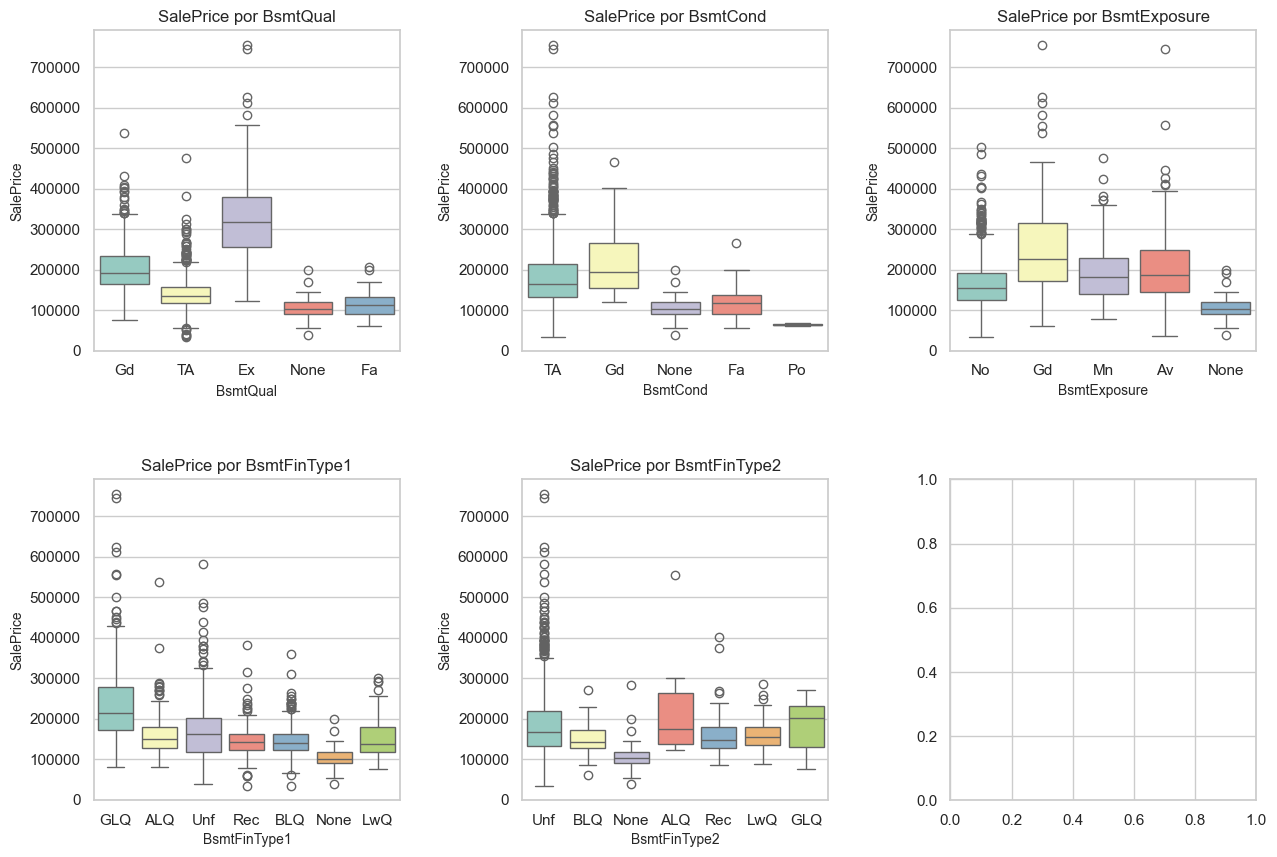

In [25]:
boxplots_multiples_categorias(train_data,"SalePrice", columnas_bsmt_categoricas)

In [15]:
diccionario_BsmtCond = {"None": 0, "Po":0, "Fa":1, "TA": 2, "Gd": 3, "Ex": 4}
train_data['BsmtCond'] = train_data['BsmtCond'].replace(diccionario_BsmtCond)

diccionario_BsmtExposure = {"None": 0, "Mn": 1, "Av": 2, "Gd": 3, "No": 0}
train_data['BsmtExposure'] = train_data['BsmtExposure'].replace(diccionario_BsmtExposure)

diccionario_BsmtFinType1 = {"None": 0, "Unf": 4, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 5, "GLQ": 6}
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].replace(diccionario_BsmtFinType1)

diccionario_BsmtFinType2 = { "None":0, "Unf": 4, "LwQ": 1, "Rec": 2, "BLQ": 3, "ALQ": 5, "GLQ": 6}
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].replace(diccionario_BsmtFinType2)

diccionario_BsmtQual = {"None": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
train_data['BsmtQual'] = train_data['BsmtQual'].replace(diccionario_BsmtQual)

- Veamos como ha quedado:

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

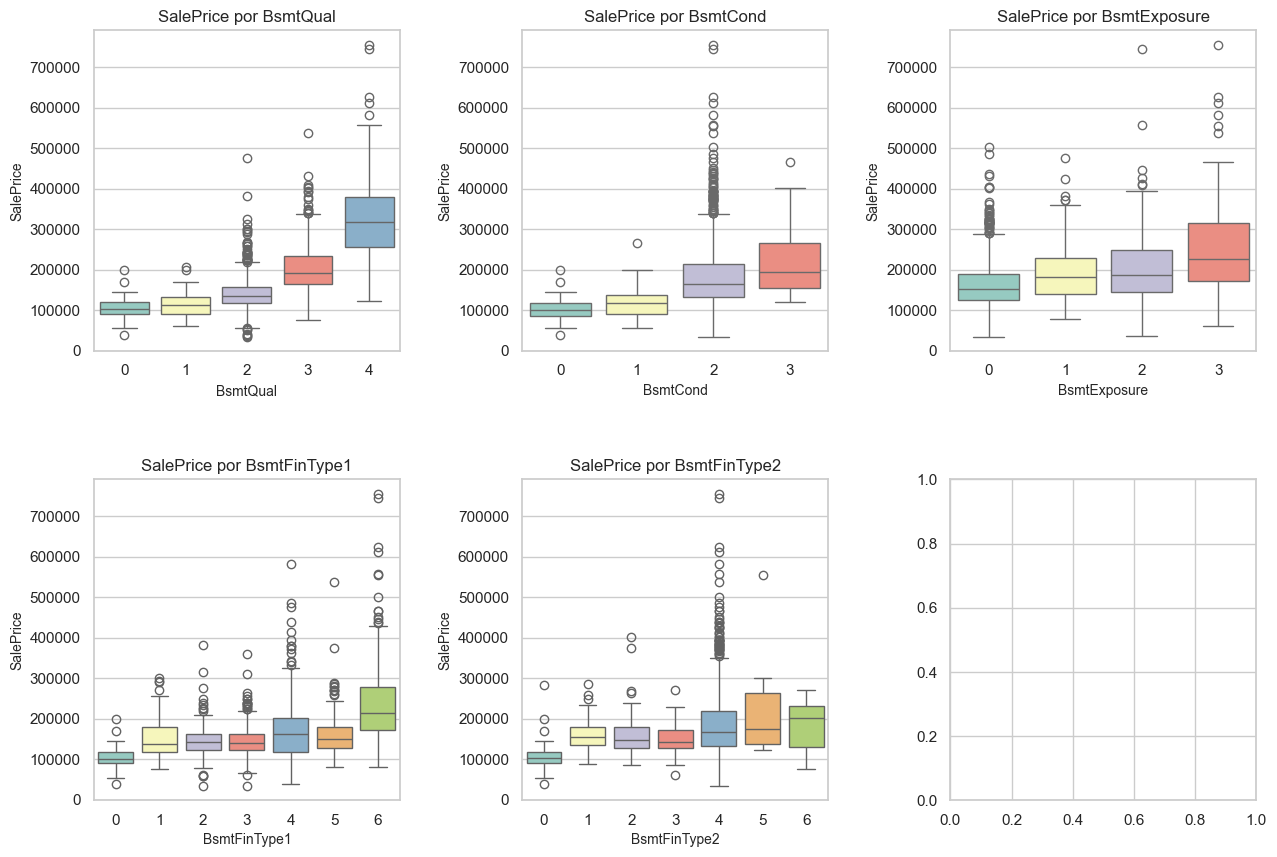

In [22]:
boxplots_multiples_categorias(train_data,"SalePrice", columnas_bsmt_categoricas)

In [28]:
boxplots_multiples_categorias(train_data,"SalePrice", columnas_categoricas)

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_29647/1308341152.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

- Hacemos lo mismo en las demás variables categoricas (lo haremos en una sola celda para ahorrar espacio)

In [30]:

dic_Alley = {"Grvl": 2, "Pave": 1, "None": 0}
train_data['Alley'] = train_data['Alley'].replace(dic_Alley)

dic_ExterCond = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 6}
train_data['ExterCond'] = train_data['ExterCond'].replace(dic_ExterCond)

dic_ExterQual = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_data['ExterQual'] = train_data['ExterQual'].replace(dic_ExterQual)

dic_GarageCond = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_data['GarageCond'] = train_data['GarageCond'].replace(dic_GarageCond)

dic_GarageQual = {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_data['GarageQual'] = train_data['GarageQual'].replace(dic_GarageQual)

dic_PoolQC = {"None": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 8}
train_data['PoolQC'] = train_data['PoolQC'].replace(dic_PoolQC)

dic_Functional = {"Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}
train_data['Functional'] = train_data['Functional'].replace(dic_Functional)

dic_KitchenQual = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_data['KitchenQual'] = train_data['KitchenQual'].replace(dic_KitchenQual)

dic_LandSlope = {"Sev": 2, "Mod": 1, "Gtl": 3}
train_data['LandSlope'] = train_data['LandSlope'].replace(dic_LandSlope)

dic_LotShape = {"IR3": 1, "IR2": 4, "IR1": 3, "Reg": 2}
train_data['LotShape'] = train_data['LotShape'].replace(dic_LotShape)

dic_PavedDrive = {"N": 0, "P": 1, "Y": 2}
train_data['PavedDrive'] = train_data['PavedDrive'].replace(dic_PavedDrive)

dic_Street = {"Grvl": 1, "Pave": 2}
train_data['Street'] = train_data['Street'].replace(dic_Street)

dic_Utilities = {"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}
train_data['Utilities'] = train_data['Utilities'].replace(dic_Utilities)


dic_HeatingQC= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
dic_Heating={'GasA': 6, 'GasW': 5, 'OthW': 4, 'Wall': 3, 'Grav': 2, 'Floor': 1}
train_data['HeatingQC']= train_data['HeatingQC'].replace(dic_HeatingQC)
train_data['Heating']= train_data['Heating'].replace(dic_Heating)

dic_CentralAir= {"N":0,"Y":1}
train_data["CentralAir"]=train_data['Heating'].replace(dic_CentralAir)

dic_MsZoning= {'C (all)':0,"RM":1,"RH":2,"RL":3,"FV":4 }
train_data["MSZoning"]=train_data["MSZoning"].replace(dic_MsZoning)

dic_LandContour={"Bnk":1,"Lvl":2,"Low":3,"HLS":4 }
train_data["LandContour"]=train_data["LandContour"].replace(dic_LandContour)

dic_Electrical={"Mix":0, "FuseP":1,"FuseF":2,"FuseA":3,"SBrkr":4}
train_data["Electrical"]=train_data["Electrical"].replace(dic_Electrical)

dic_MsVnrType= {"None":0,"BrkCmn":1,"BrkFace":2,"Stone":3}
train_data["MasVnrType"]=train_data["MasVnrType"].replace(dic_MsVnrType)

dic_FireplaceQu= {"None":0, "Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
train_data["FireplaceQu"]=train_data["FireplaceQu"].replace(dic_FireplaceQu)

dic_GarageFinish={"None":0,"Unf":1,"RFn":2,"Fin":3}
train_data["GarageFinish"]=train_data["GarageFinish"].replace(dic_GarageFinish)

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_categorica, y=columna_numerica, data=dataframe, palette="Set3", ax=axs[row, col])
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_30282/1853050205.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

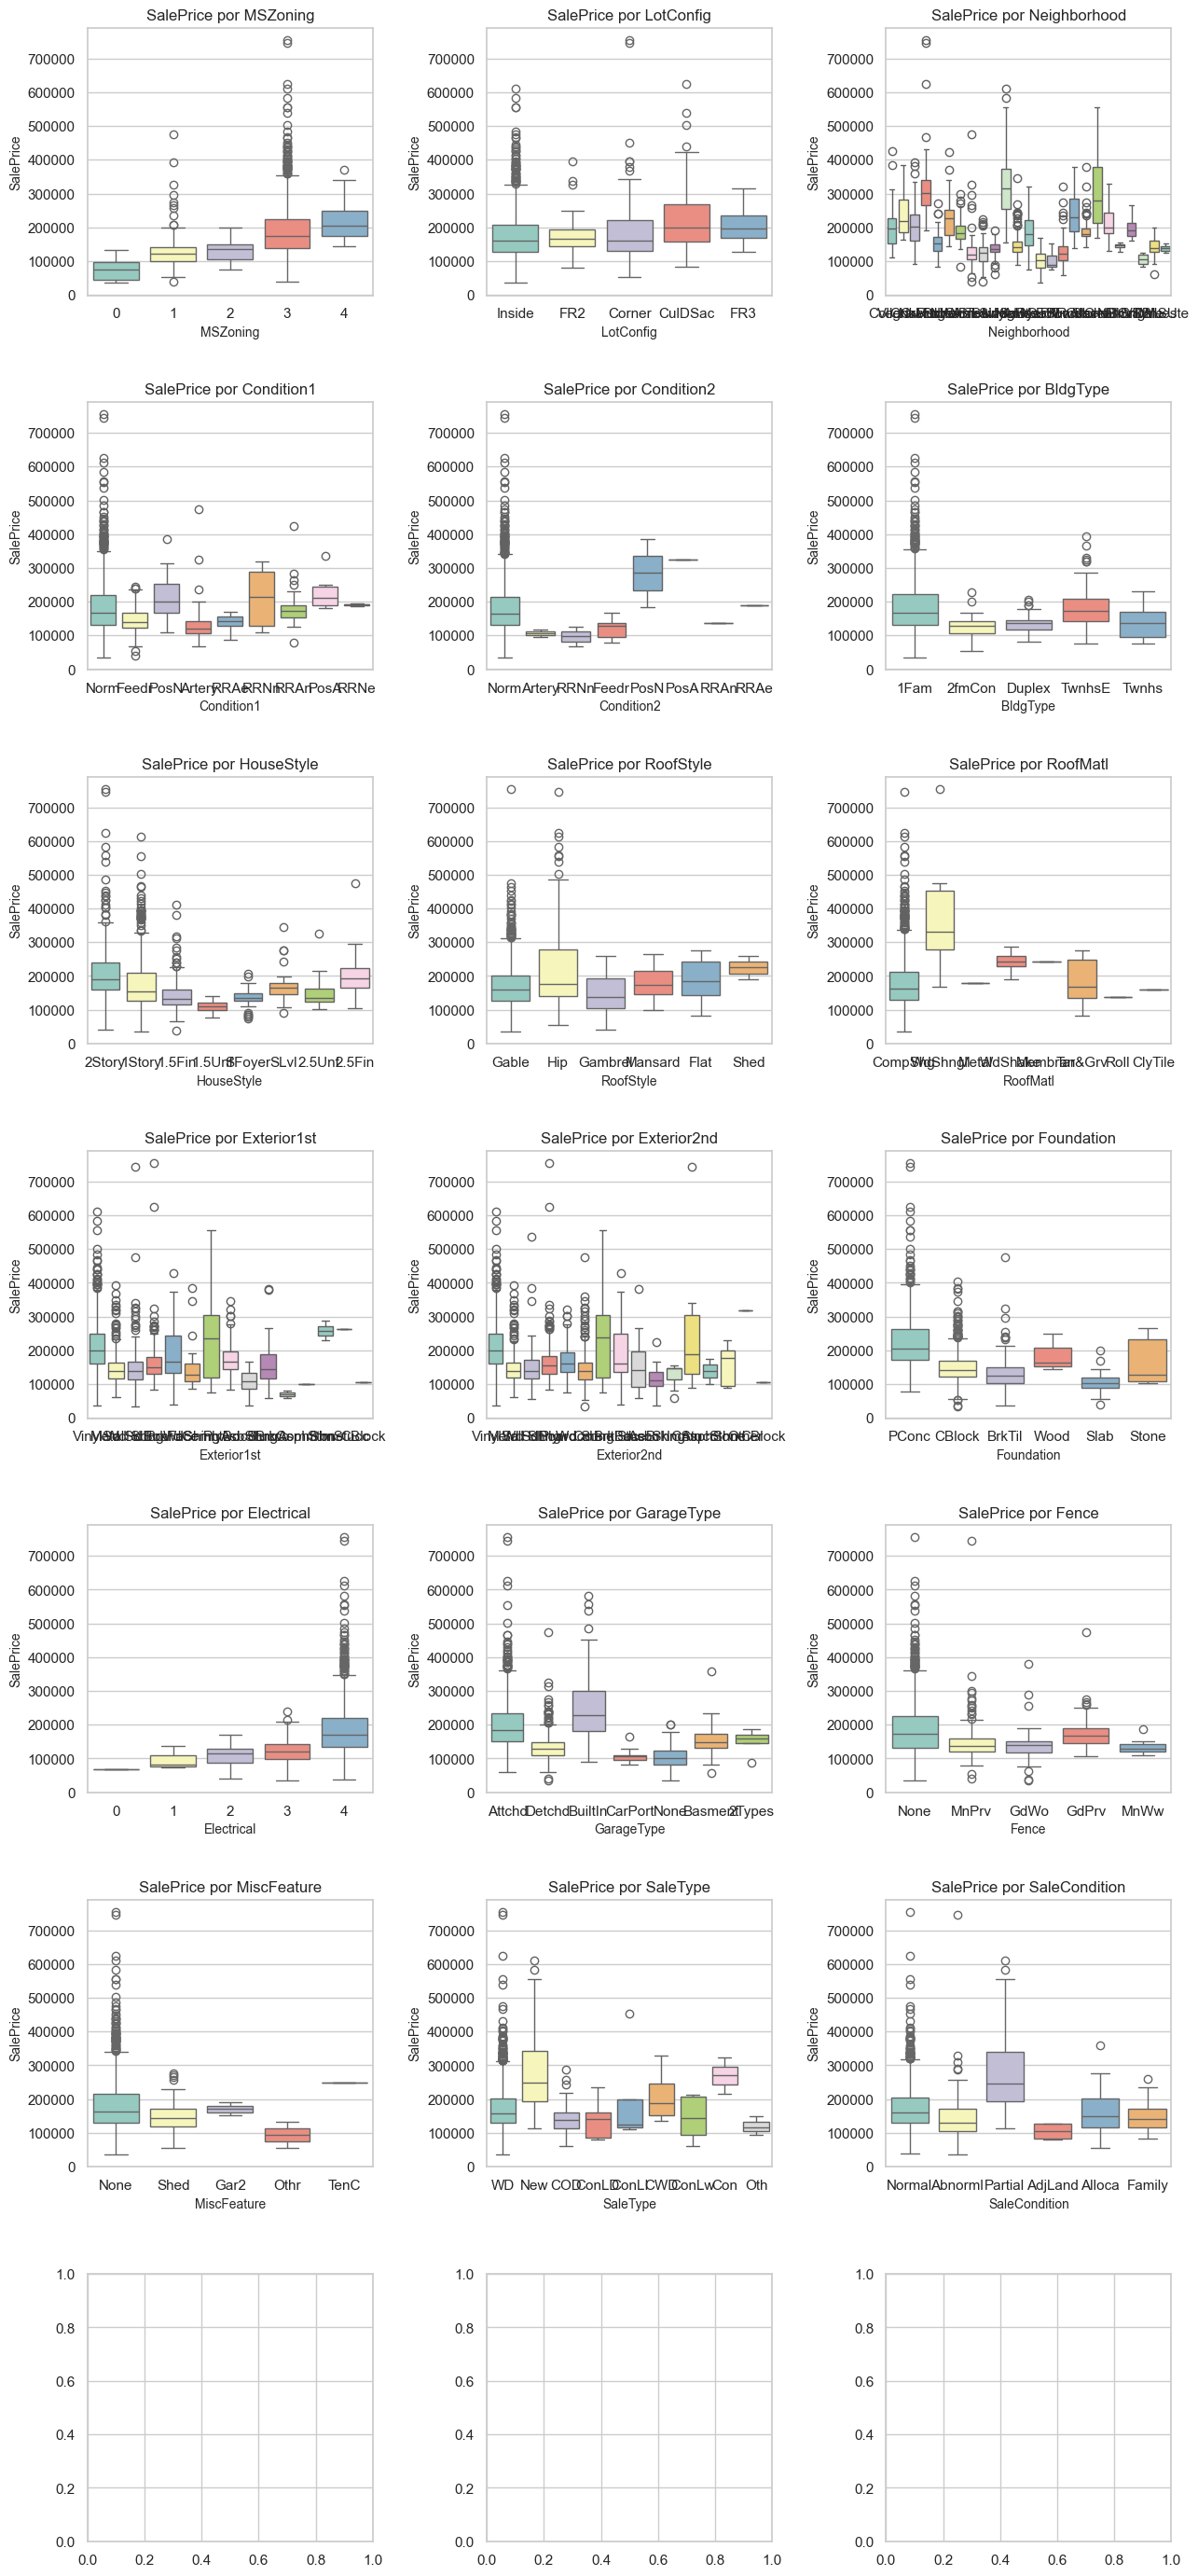

In [32]:
boxplots_multiples_categorias(train_data,"SalePrice", columnas_categoricas)

#### 2.2 Variables dummies

El resto de variables categóricas las convertiremos a variables dummies.

In [35]:
#Obtenemos las columnas categóricas
dummies_cols = train_data.select_dtypes(include=object).columns
dummies = pd.get_dummies(train_data[dummies_cols],dtype=int) 

# Obtención de variables numéricas.
int_cols = train_data.select_dtypes(include = ['float64','int64']).columns
int_cols = int_cols[int_cols != "SalePrice"]

train_data = pd.concat([train_data.loc[:1460, int_cols].dropna(), dummies.loc[:1460, :].dropna(), train_data["SalePrice"].dropna()], axis=1)

- Nos aseguramos de que todas las variables sean numéricas 

In [39]:
def comprobar_columnas_num(df):
 todas_numericas = all(np.issubdtype(df[col].dtype, np.number) for col in df.columns)
 if todas_numericas:
    print("Todas las columnas son numéricas.")
 else:
    print("Hay columnas no numéricas en el DataFrame.")


In [40]:
comprobar_columnas_num(train_data)

Todas las columnas son numéricas.


In [41]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,2,0,2,2,4,3,...,0,0,1,0,0,0,0,1,0,208500
2,20,3,80.0,9600,2,0,2,2,4,3,...,0,0,1,0,0,0,0,1,0,181500
3,60,3,68.0,11250,2,0,3,2,4,3,...,0,0,1,0,0,0,0,1,0,223500
4,70,3,60.0,9550,2,0,3,2,4,3,...,0,0,1,1,0,0,0,0,0,140000
5,60,3,84.0,14260,2,0,3,2,4,3,...,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,2,0,2,2,4,3,...,0,0,1,0,0,0,0,1,0,175000
1457,20,3,85.0,13175,2,0,2,2,4,3,...,0,0,1,0,0,0,0,1,0,210000
1458,70,3,66.0,9042,2,0,2,2,4,3,...,0,0,1,0,0,0,0,1,0,266500


### Guardamos los datos

In [43]:

train_data.to_csv('train_1.csv', index=False)


### 3. Distribución de los datos 

#### 3.1 Distribución de la variable target 

Asimetría: 1.880940746034036
Curtosis: 6.509812011089439


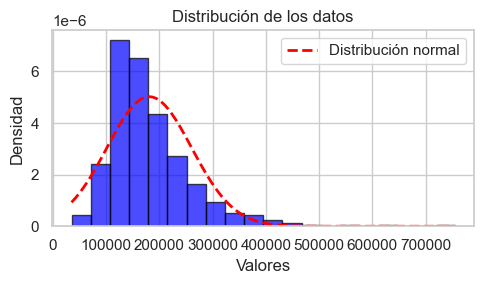

In [ ]:
fu.distribucion(train_data["SalePrice"])

La variable objetivo tiene una asimetria positiva considerable (1,9), lo que es indicativo de una cola derecha larga, que en nuestro caso concreto implica una mayor presencia de casas con precios más altos respecto a la media en comparación a una distribución normal. Asismismo, la distribución es más apuntalada que una distribución normal (curtosis 6,5). 

Para trabajar con datos más semejantes a una distribución normal, aplicaremos una transformación logarítmica. 

Asimetría: 0.12122191311528359
Curtosis: 0.8026427107468055


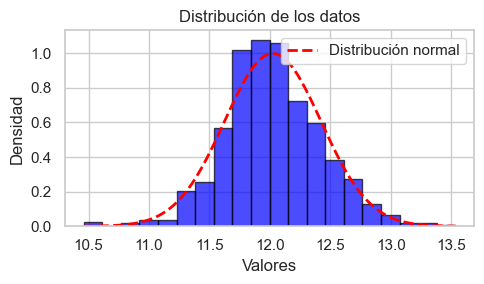

In [ ]:
fu.distribucion(np.log1p(train_data["SalePrice"]))

#### 3.2 Distribución de las features 

In [ ]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Asimetría: 1.4062101115313512
Curtosis: 1.5706747728574895


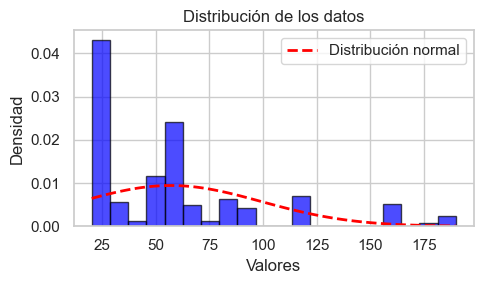

In [ ]:
fu.distribucion(train_data["MSSubClass"])

Asimetría: 0.2487412176191193
Curtosis: -1.0948908781156945


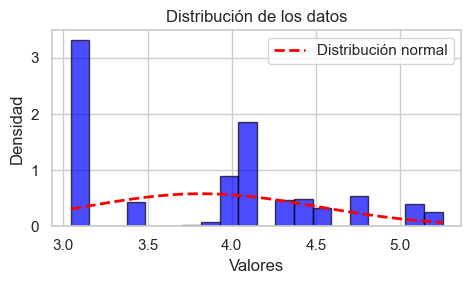

In [ ]:
fu.distribucion(np.log1p(train_data["MSSubClass"]))